In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Read the data files
walking_acc = pd.read_csv('../Kebutuhan/(Walking) 2025-11-04 16-11-45.csv')
running_acc = pd.read_csv('../Kebutuhan/(Running) 2025-11-04 16-15-33.csv')
walking_gyro = pd.read_csv('../Kebutuhan/Gyro_Walking.csv')
running_gyro = pd.read_csv('../Kebutuhan/Gyro_Running.csv')

In [2]:
# Function to resample data to a specific frequency
def resample_data(df, target_freq):
    # Calculate the time difference between samples
    time = df['Time (s)'].values
    dt = np.mean(np.diff(time))
    
    # Create a regular time index
    regular_time = np.arange(time[0], time[-1], 1/target_freq)
    
    # Interpolate the data to the new frequency
    resampled_data = {}
    for column in df.columns:
        if column != 'Time (s)':
            resampled_data[column] = np.interp(regular_time, time, df[column].values)
    
    resampled_df = pd.DataFrame(resampled_data)
    resampled_df['Time (s)'] = regular_time
    
    return resampled_df

# Function to apply Low Pass Filter
def apply_lpf(data, fs, cutoff_freq):
    nyquist = fs/2
    order = 4  # Filter order
    normal_cutoff = cutoff_freq / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

# Function to apply High Pass Filter
def apply_hpf(data, fs, cutoff_freq):
    nyquist = fs/2
    order = 4  # Filter order
    normal_cutoff = cutoff_freq / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

# Function to plot filtered signals
def plot_filtered_signal(original_df, sampling_freq, filter_type, cutoff_freq, title, y_column, y_label):
    # Resample data to the specified frequency
    resampled_df = resample_data(original_df, sampling_freq)
    
    # Apply filter
    if filter_type == 'lpf':
        filtered_data = apply_lpf(resampled_df[y_column].values, sampling_freq, cutoff_freq)
    else:  # hpf
        filtered_data = apply_hpf(resampled_df[y_column].values, sampling_freq, cutoff_freq)
    
    # Plot original and filtered signals
    plt.figure(figsize=(12, 6))
    plt.plot(resampled_df['Time (s)'], resampled_df[y_column], label='Original', alpha=0.5)
    plt.plot(resampled_df['Time (s)'], filtered_data, label='Filtered', linewidth=2)
    plt.title(f'{title} - Sampling Frequency: {sampling_freq} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.show()

# 2a. Low Pass Filter for Accelerometer Data
Using cutoff frequency of 1.2 Hz for the accelerometer data (between 0.8 Hz and 1.5 Hz as specified)

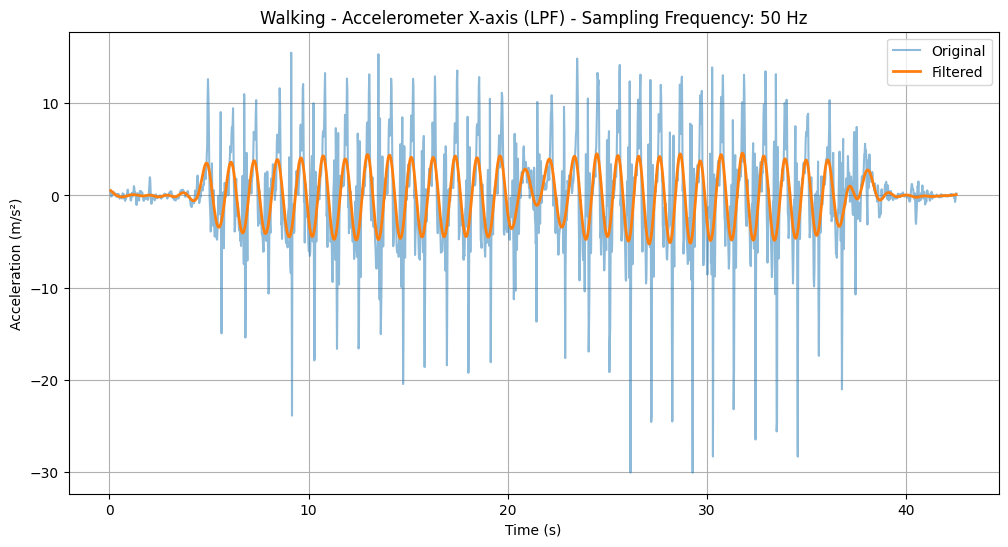

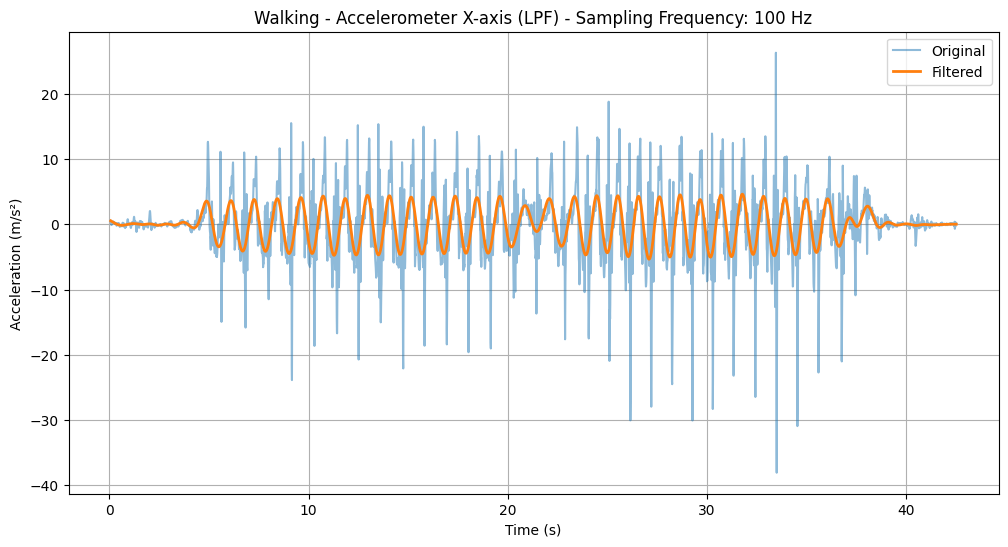

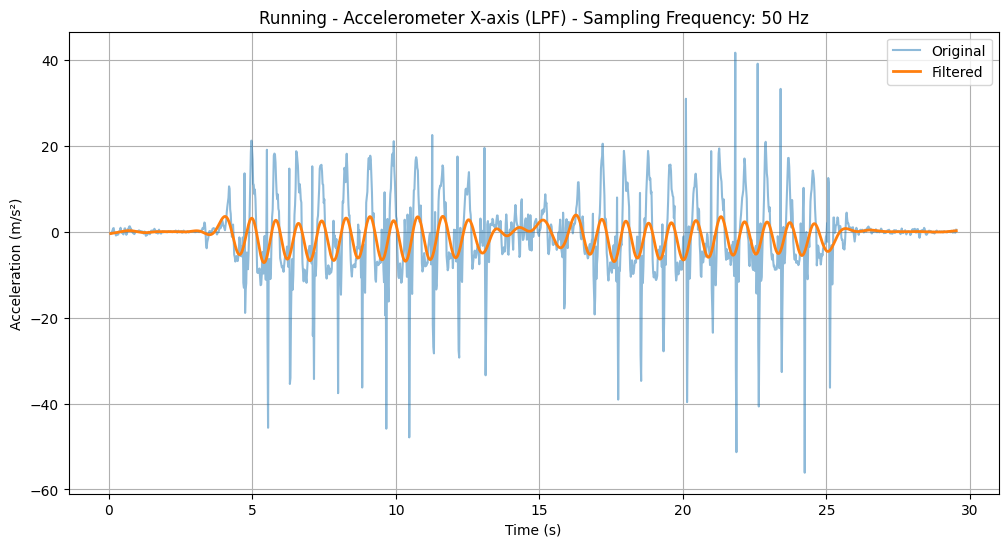

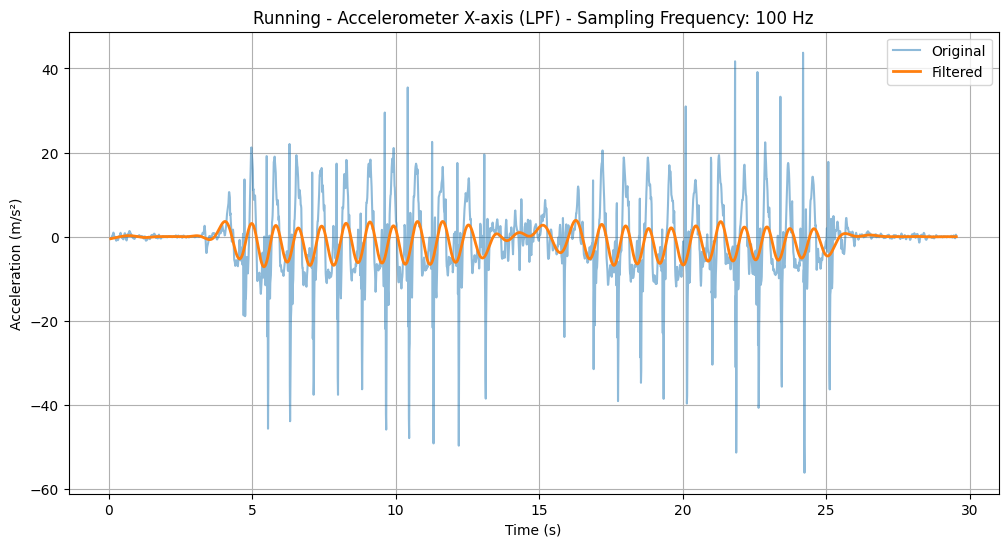

In [3]:
# Low Pass Filter for Walking Accelerometer Data
# Using cutoff frequency of 1.2 Hz

# 1. Plot for 50Hz sampling
plot_filtered_signal(walking_acc, 50, 'lpf', 1.2,
                    'Walking - Accelerometer X-axis (LPF)',
                    'Linear Acceleration x (m/s^2)',
                    'Acceleration (m/s²)')

# 2. Plot for 100Hz sampling
plot_filtered_signal(walking_acc, 100, 'lpf', 1.2,
                    'Walking - Accelerometer X-axis (LPF)',
                    'Linear Acceleration x (m/s^2)',
                    'Acceleration (m/s²)')

# Low Pass Filter for Running Accelerometer Data
# 3. Plot for 50Hz sampling
plot_filtered_signal(running_acc, 50, 'lpf', 1.2,
                    'Running - Accelerometer X-axis (LPF)',
                    'Linear Acceleration x (m/s^2)',
                    'Acceleration (m/s²)')

# 4. Plot for 100Hz sampling
plot_filtered_signal(running_acc, 100, 'lpf', 1.2,
                    'Running - Accelerometer X-axis (LPF)',
                    'Linear Acceleration x (m/s^2)',
                    'Acceleration (m/s²)')

# 2b. High Pass Filter for Gyroscope Data
Using cutoff frequency of 17.5 Hz for the gyroscope data (between 15 Hz and 20 Hz as specified)

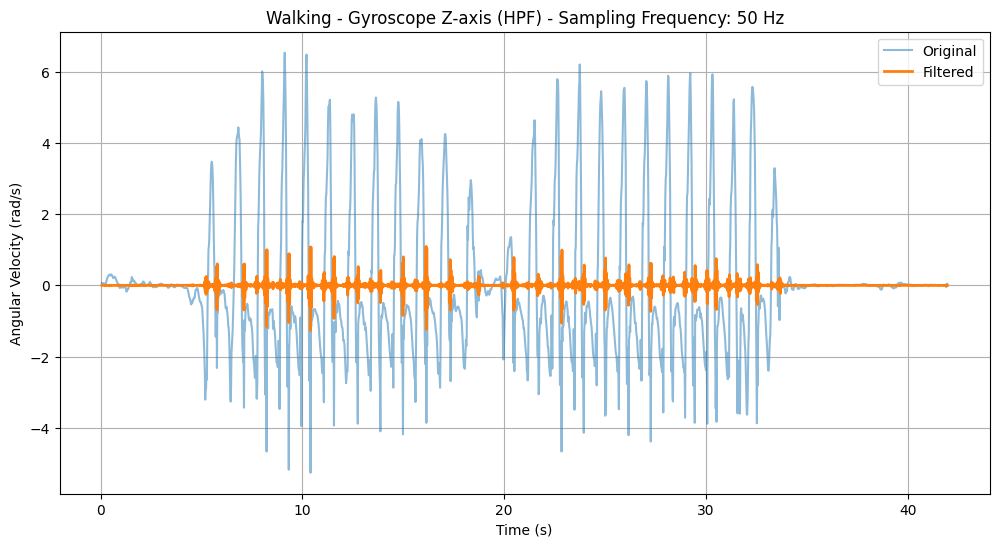

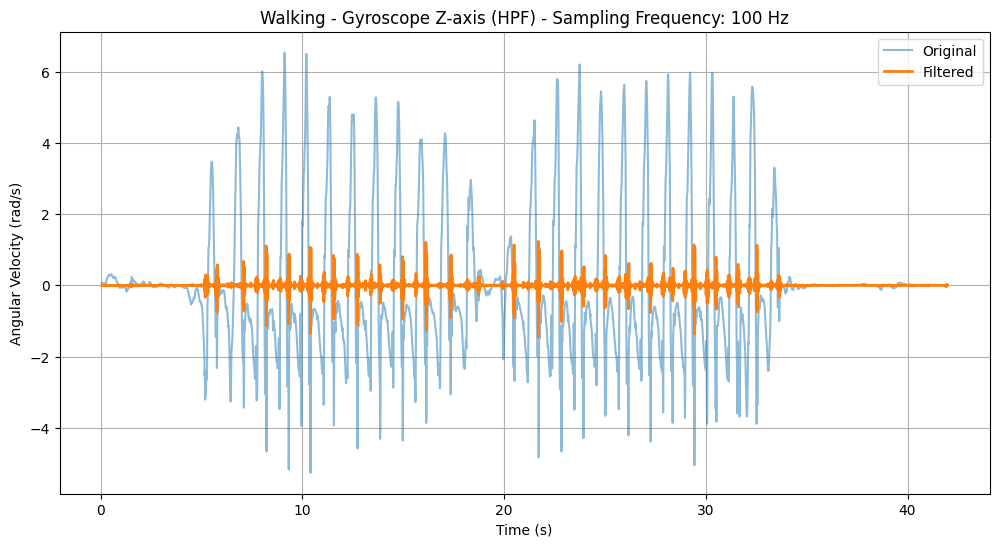

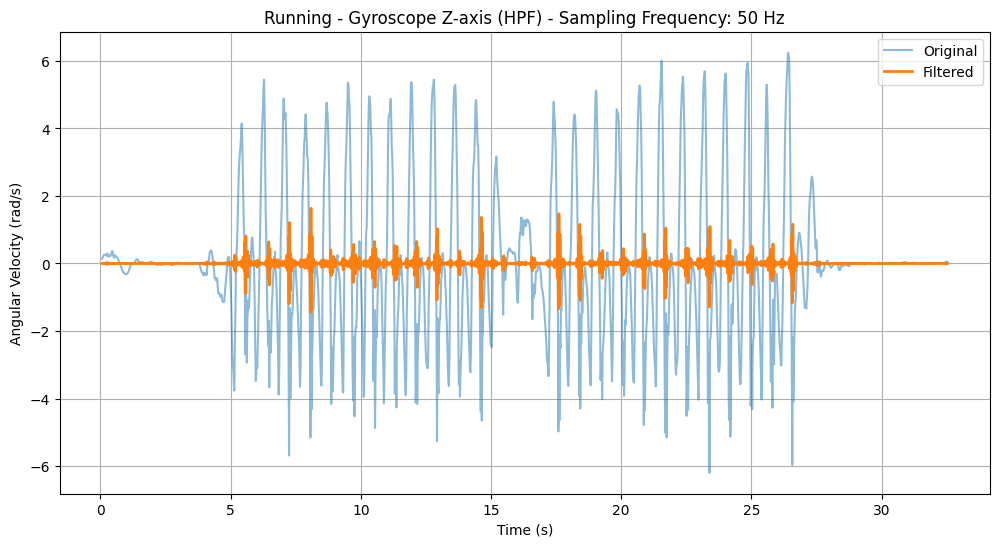

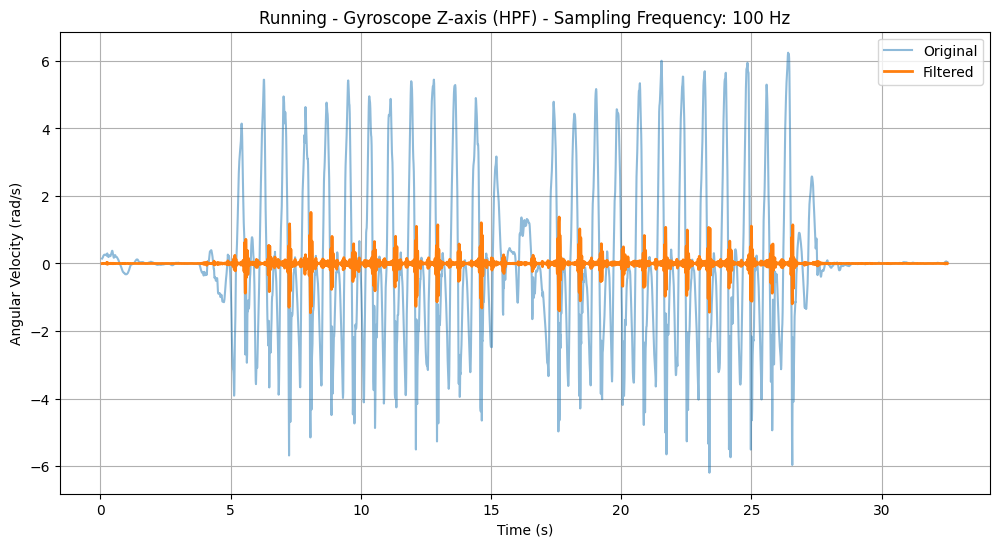

In [4]:
# High Pass Filter for Walking Gyroscope Data
# Using cutoff frequency of 17.5 Hz

# 1. Plot for 50Hz sampling
plot_filtered_signal(walking_gyro, 50, 'hpf', 17.5,
                    'Walking - Gyroscope Z-axis (HPF)',
                    'Gyroscope z (rad/s)',
                    'Angular Velocity (rad/s)')

# 2. Plot for 100Hz sampling
plot_filtered_signal(walking_gyro, 100, 'hpf', 17.5,
                    'Walking - Gyroscope Z-axis (HPF)',
                    'Gyroscope z (rad/s)',
                    'Angular Velocity (rad/s)')

# High Pass Filter for Running Gyroscope Data
# 3. Plot for 50Hz sampling
plot_filtered_signal(running_gyro, 50, 'hpf', 17.5,
                    'Running - Gyroscope Z-axis (HPF)',
                    'Gyroscope z (rad/s)',
                    'Angular Velocity (rad/s)')

# 4. Plot for 100Hz sampling
plot_filtered_signal(running_gyro, 100, 'hpf', 17.5,
                    'Running - Gyroscope Z-axis (HPF)',
                    'Gyroscope z (rad/s)',
                    'Angular Velocity (rad/s)')